# PA 3: Association Analysis - Apriori Algorithm

## Student Details

Student Name and ID:  Sai Rohith Pasala; 1001873156  <----- Only this student will submit the assignment

Student Name and ID:  Sri Naga Venkata Pavan Kalyan Sirigibattula; 1001886149

Student Name and ID:  Rutvik Naga Sai Dondapati; 1001879177


Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.


## Submission Instructions


Step 1: Create a folder and name it 'lastname_firstname_yourNetID_PA3'

Step 2: Rename this submission file as 'lastname_firstname_yourNetID_PA3.ipynb' and place it inside the folder 'lastname_firstname_yourNetID_PA3'

Step 3: Rename the updated dataset file 'dataset.csv' and place it inside the folder 'lastname_firstname_yourNetID_PA3'

Step 4: Your submission folder should include ONLY the following files:

*	apriory.py,
*	lastname_firstname_yourNetID_PA3.ipynb,
*	datasets
*	toyDS.csv

Step 5: Zip this folder and submit it on canvas Your final submission folder name should be 'lastname_firstname_yourNetID_PA3.ZIP'



## Programming Assignment Details

Before you start:

Be familiar with the algorithm and with the dataset.
If you use external sources make sure that you cite them, and be specific!
Make sure that your code is running before you upload your submission file. TA will not debug your code.
Start early!

For this assignment, you will have to use:

Jupyter notebook,
the 'Random Shopping cart' dataset [01],
and the Apriori Algorithm (apriory.py)[02]. Note that the apriory.py file is modified to run with Python 3.


## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
return false;
}


<IPython.core.display.Javascript object>

In [2]:
# Import your Libraries
import re
import pandas as pd

### Task 1: DataSet Preprocess

Before you start you need to modify your dataset 'dataset_group.csv' to look like the toyDS.csv.
Each transaction is at one line with a variable length. Discard the date attribute (1st attribute) from your dataset. For example, in your dataset transaction#4 should look like:

cereals,juice,lunch meat,soda,toilet paper,all-purpose

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


In [3]:
DF_Grosy = pd.read_csv('Groceries_dataset.csv', sep=',')#syntax to import the csv dataset file
DF_Grosy.columns= ['Date','Member_number','itemDescription']  # saving the column names to dataframe created in above step

DF_Grosy #dispaying the dataframe just to check

,Date,Member_number,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk
...,...,...,...
38760,4471,8/10/2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,3/12/2014,fruit/vegetable juice


In [4]:


#Arranging/grouping the all the orders/ transactions by the Transaction id/number

Group_transact = DF_Grosy.groupby('Member_number')['itemDescription'].apply(', '.join).reset_index()

#Deleting/ dropping the Transaction value to make the dataset look like a Items dataset
Group_transact = Group_transact.drop(['Member_number'], axis = 1)


itemstring=Group_transact['itemDescription'].str.split(',')#splitting the data
itemlist=itemstring.tolist()    #converting the data to list
Dataset_CONVERT= pd.DataFrame(itemlist)  #storing the list to dataframe as a dataset

# exporting the converted preprocessed file to csv
Dataset_CONVERT.to_csv('dataset.csv', index = False,header=False)
 






In [5]:
procsed_Grosy = pd.read_csv('dataset.csv',header=None) #importing preprocessed csv file
print("First seven transactions are:\n")
#printing first 5 transactions the imported preprocesed csv file
procsed_Grosy.head(10)


First seven transactions are:



,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,cleaner,sausage,tropical fruit,whole milk,citrus fruit,onions,other vegetables,berries,hamburger meat,hamburger meat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,canned beer,frozen meals,butter,ham,citrus fruit,tropical fruit,dessert,whole milk,tropical fruit,frankfurter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,rolls/buns,liquor (appetizer),pastry,finished products,tropical fruit,meat,long life bakery product,citrus fruit,curd,rolls/buns,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citrus fruit,other vegetables,white bread,bottled water,root vegetables,other vegetables,ice cream,sausage,rolls/buns,semi-finished bread,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,whole milk,other vegetables,whole milk,whole milk,soda,rolls/buns,other vegetables,other vegetables,soda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,other vegetables,berries,bottled water,whole milk,yogurt,whole milk,canned beer,sausage,yogurt,tropical fruit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,beef,berries,sausage,meat,root vegetables,curd,whole milk,frozen vegetables,whole milk,shopping bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,chicken,ice cream,sparkling wine,whole milk,canned beer,berries,whole milk,sausage,whole milk,sausage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,other vegetables,pip fruit,frankfurter,sugar,other vegetables,frozen vegetables,beef,waffles,beef,meat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,whole milk,canned beer,bottled water,soda,whole milk,other vegetables,whole milk,canned beer,pip fruit,tropical fruit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#display last 10 elements of preprocessed datatset sv
procsed_Grosy.tail(10)


,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
718,yogurt,other vegetables,rolls/buns,frankfurter,tropical fruit,root vegetables,curd,chicken,yogurt,hamburger meat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719,dog food,curd,whole milk,ham,sausage,whipped/sour cream,pastry,instant coffee,coffee,soda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720,sausage,pork,whole milk,rolls/buns,pastry,whipped/sour cream,tropical fruit,whipped/sour cream,pork,soda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,sausage,specialty chocolate,pork,rolls/buns,tropical fruit,whole milk,tropical fruit,ham,pastry,citrus fruit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722,butter,tropical fruit,yogurt,sausage,waffles,pot plants,other vegetables,coffee,other vegetables,whole milk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
723,pork,rolls/buns,ice cream,hamburger meat,chicken,pork,canned beer,pastry,rolls/buns,pork,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,newspapers,whole milk,root vegetables,soda,rolls/buns,whipped/sour cream,domestic eggs,butter,root vegetables,sausage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,rolls/buns,pip fruit,meat,sweet spreads,sausage,sausage,whole milk,tropical fruit,chicken,pet care,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726,berries,berries,soda,soda,fruit/vegetable juice,coffee,soda,yogurt,long life bakery product,other vegetables,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,bottled beer,shopping bags,pork,root vegetables,onions,bottled water,whipped/sour cream,pork,sausage,other vegetables,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


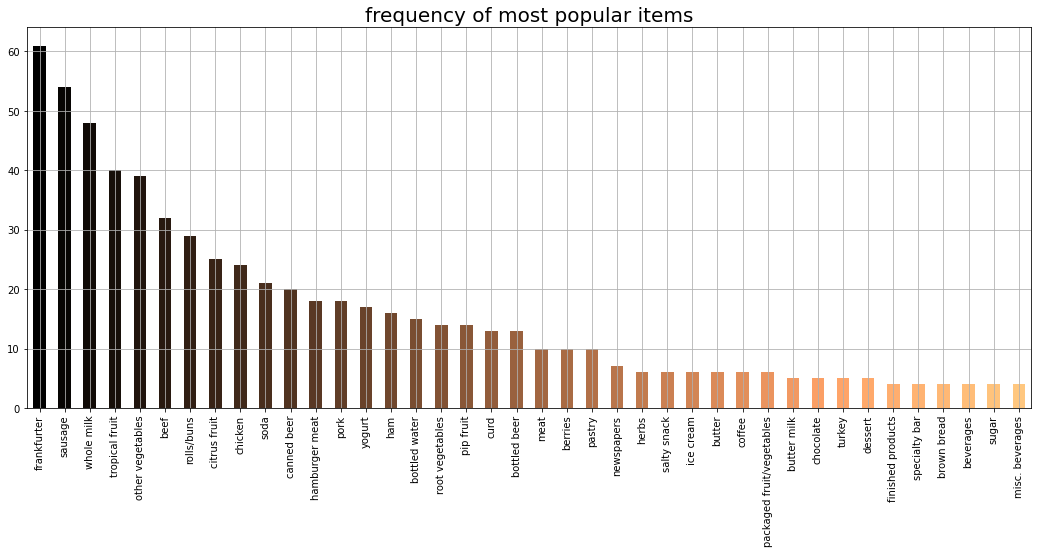

In [7]:
#Sample visualization to see the dataset in bar Graph

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
procsed_Grosy[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

### Task 2: Run apriory.py and Evaluate Results
In this task, you have to find how you will be able to execute and print apriory results by making use only the apriory.py. In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!".

(*) For those that are not familiar with python and coding this could be a quite demanding task.

You will have to execute apriori algorithm "3" times for different combinations of support and confidence. Print the results of apriory for 'dataset.csv' by making use ONLY the provided methods.

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way.
 
You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments.


In [8]:

print ('======================== Code for Task 2, Case:1 ===========================') 
print('***********************************************************************************************************')
print('After observing the support values of each item in the given dataset, I came to an understanding that most of the items support range is from 0.02 to 0.478 and if the min-support exceeds 47.8 percent then none of the items will be\nconsidered as frequent set item and no rules will generated. So, to avoid this case we have considered the support values  which are less than 47.8 percent as minimum support.')
print('***********************************************************************************************************')

print ('Case 1 (minimum support=0.8 and minimum confidence=0.5)')
print ('Case 1 Reasoning:') 
print ('\n When we keep the minimum support as 80% and increase the minimum confidence interval to 0.9, \n We see that only  6 rules are generated. This is because only 6 of them are 80% likely to happen.\n Although there are many rules obtained, when minimum confidence is increased the rules may decrease as \n we tend to increase the accuracy of our prediction and vice-versa.')

print ('Case 1 Output:')

#syntax to run the given dataset which is preprocessed agianst apriori.py file

%run apriori.py -f dataset.csv -s 0.8 c 0.9


======================== Code for Task 2, Case:1 ===========================
***********************************************************************************************************
After observing the support values of each item in the given dataset, I came to an understanding that most of the items support range is from 0.02 to 0.478 and if the min-support exceeds 47.8 percent then none of the items will be
considered as frequent set item and no rules will generated. So, to avoid this case we have considered the support values  which are less than 47.8 percent as minimum support.
***********************************************************************************************************
Case 1 (minimum support=0.8 and minimum confidence=0.5)
Case 1 Reasoning:

 When we keep the minimum support as 80% and increase the minimum confidence interval to 0.9, 
 We see that only  6 rules are generated. This is because only 6 of them are 80% likely to happen.
 Although there are many rules 

In [9]:
print ('======================== Code for Task 2, Case:2 ===========================')
print ('Case 1 (minimum support=0.95 and minimum confidence=0.5)')
print ('Case 1 Reasoning:') 
print (" \n  When minimum support is given as 90% we can see that 2 items are generated.\n  i.e only Whole Milk are bought in more than 50% of the transactions.\n  Hence there wont  be an assciation rule for any value of minimum confidence \n  as they are only two items  generated.")

print ('Case 1 Output:')
#syntax to run the given dataset which is preprocessed agianst apriori.py file
%run apriori.py -f dataset.csv -s 0.9 c 0.5

======================== Code for Task 2, Case:2 ===========================
Case 1 (minimum support=0.95 and minimum confidence=0.5)
Case 1 Reasoning:
 
  When minimum support is given as 90% we can see that 2 items are generated.
  i.e only Whole Milk are bought in more than 50% of the transactions.
  Hence there wont  be an assciation rule for any value of minimum confidence 
  as they are only two items  generated.
Case 1 Output:

------------ITEMS-----------------
item: (' other vegetables',) , 0.904
item: (' whole milk',) , 0.957

------------RULES-----------------




In [10]:
print ('======================== Code for Task 2, Case:3 ===========================')
print ('Case 1 (minimum support=XX and minimum confidence=YY)')
print ('Case 1 Reasoning:') 
print ("""Case 3 Reasoning: \nWhen minimum support is given as 70% and confidence is given as 60% we can see that only 24 items are generated.\n  """)
print("Item whole milk has the highest support i.e 0.687.\n This means that whole milk is the most frequent item.""")
print("\nRule: (' soda',) ==> (' whole milk',)  has highest confidence i.e 0.825. Which implies that soda,buns, other vegetables, yoghurt  are frequently purchased along with wholemilk .Hence they can be placed near wholemilk for higher sales.")
print ('\nCase 1 Output:')
#syntax to run the given dataset which is preprocessed agianst apriori.py file
%run apriori.py -f dataset.csv -s 0.7 c 0.6

======================== Code for Task 2, Case:3 ===========================
Case 1 (minimum support=XX and minimum confidence=YY)
Case 1 Reasoning:
Case 3 Reasoning: 
When minimum support is given as 70% and confidence is given as 60% we can see that only 24 items are generated.
  
Item whole milk has the highest support i.e 0.687.
 This means that whole milk is the most frequent item.

Rule: (' soda',) ==> (' whole milk',)  has highest confidence i.e 0.825. Which implies that soda,buns, other vegetables, yoghurt  are frequently purchased along with wholemilk .Hence they can be placed near wholemilk for higher sales.

Case 1 Output:

------------ITEMS-----------------
item: (' tropical fruit',) , 0.705
item: (' root vegetables', ' whole milk') , 0.716
item: (' rolls/buns', ' whole milk', ' soda') , 0.717
item: (' whole milk', ' other vegetables', ' yogurt') , 0.720
item: (' rolls/buns', ' yogurt') , 0.727
item: (' whole milk', ' other vegetables', ' soda') , 0.735
item: (' rolls/buns'

### References

https://www.kaggle.com/acostasg/random-shopping-cart (https://www.kaggle.com/acostasg/random-shopping-cart)

https://github.com/asaini/Apriori (https://github.com/asaini/Apriori)
